In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, PowerTransformer
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import cm
import altair as alt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [0]:
data = pd.read_csv("/content/HCV-Egy-Data.csv")
y_classes = pd.DataFrame(np.asarray(data['Baselinehistological staging']))
data = data.drop('Baselinehistological staging', axis=1)

In [0]:
def drop_class(x,y, c):
    result = deepcopy(y)
    data = deepcopy(x)
    for i in range(len(data)):
        if y[0][i] == c:
            data = data.drop(i, axis = 0)
            result = result.drop(i, axis=0)
    return data.reset_index(), result.reset_index()

In [0]:
data_without_3, y_without_3 = drop_class(data,y_classes, 3)
data_without_34, y_without_34 = drop_class(data_without_3,y_without_3, 4)
data = data_without_34.drop('level_0', axis=1)
y_classes = y_without_34.drop('level_0', axis=1)
data = data.drop('index', axis=1)
y_classes = y_classes.drop('index', axis=1)

In [0]:
#data = data.drop('Age', axis = 1)
data = data.drop('Gender', axis = 1)
#data = data.drop('BMI', axis = 1)
data = data.drop('Headache ', axis = 1)
data = data.drop('Diarrhea ', axis = 1)
data = data.drop('Fatigue & generalized bone ache ', axis = 1)
data = data.drop('Jaundice ', axis = 1)
#data = data.drop('WBC', axis = 1)
#data = data.drop('RBC', axis = 1)
#data = data.drop('HGB', axis = 1)
#data = data.drop('AST 1', axis = 1)
#data = data.drop('ALT 1', axis = 1)
#data = data.drop('ALT4', axis = 1)
#data = data.drop('ALT 12', axis = 1)
#data = data.drop('ALT 24', axis = 1)
#data = data.drop('ALT 36', axis = 1)
#data = data.drop('ALT 48', axis = 1)
#data = data.drop('ALT after 24 w', axis = 1)
#data = data.drop('RNA Base', axis = 1)
#data = data.drop('RNA 4', axis = 1)
#data = data.drop('RNA 12', axis = 1)
#data = data.drop('RNA EOT', axis = 1)
#data = data.drop('RNA EF', axis = 1)
data = data.drop('Fever', axis = 1)
data = data.drop('Nausea/Vomting', axis = 1)
data = data.drop('Epigastric pain ', axis = 1)
#data = data.drop('Plat', axis = 1)
#data = data.drop('Baseline histological Grading', axis = 1)

In [25]:
data.columns.values

array(['Age', 'BMI', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading'], dtype=object)

In [26]:
data = PolynomialFeatures(5).fit_transform(data)
data = pd.DataFrame(data)
data = data.drop(0, axis = 1)
print('classes length = ' + str(len(y_classes)) +'  data length = ' + str(len(data)))
data.head()

classes length = 1385  data length = 1385


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,53090,53091,53092,53093,53094,53095,53096,53097,53098,53099,53100,53101,53102,53103,53104,53105,53106,53107,53108,53109,53110,53111,53112,53113,53114,53115,53116,53117,53118,53119,53120,53121,53122,53123,53124,53125,53126,53127,53128,53129
0,56.0,35.0,7425.0,4248807.0,14.0,112132.0,99.0,84.0,52.0,109.0,81.0,5.0,5.0,5.0,655330.0,634536.0,288194.0,5.0,5.0,13.0,3136.0,1960.0,415800.0,237933192.0,784.0,6279392.0,5544.0,4704.0,2912.0,6104.0,4536.0,280.0,280.0,280.0,36698480.0,35534016.0,16138864.0,280.0,280.0,728.0,...,1.038197e+13,2.699313e+13,7.018214e+13,1.824736e+14,1.801212e+08,1.801212e+08,4.683152e+08,1.801212e+08,4.683152e+08,1.217620e+09,1.801212e+08,4.683152e+08,1.217620e+09,3.165811e+09,1.801212e+08,4.683152e+08,1.217620e+09,3.165811e+09,8.231109e+09,3.125000e+03,3.125000e+03,8.125000e+03,3.125000e+03,8.125000e+03,2.112500e+04,3.125000e+03,8.125000e+03,2.112500e+04,5.492500e+04,3.125000e+03,8.125000e+03,2.112500e+04,5.492500e+04,1.428050e+05,3.125000e+03,8.125000e+03,2.112500e+04,5.492500e+04,1.428050e+05,371293.0
1,46.0,29.0,12101.0,4429425.0,10.0,129367.0,91.0,123.0,95.0,75.0,113.0,57.0,123.0,44.0,40620.0,538635.0,637056.0,336804.0,31085.0,4.0,2116.0,1334.0,556646.0,203753550.0,460.0,5950882.0,4186.0,5658.0,4370.0,3450.0,5198.0,2622.0,5658.0,2024.0,1868520.0,24777210.0,29304576.0,15492984.0,1429910.0,184.0,...,1.219012e+25,1.568617e+21,2.018488e+17,2.597378e+13,8.197597e+27,7.565893e+26,9.735748e+22,6.982868e+25,8.985515e+21,1.156251e+18,6.444771e+24,8.293094e+20,1.067151e+17,1.373203e+13,5.948139e+23,7.654031e+19,9.849163e+15,1.267385e+12,1.630863e+08,4.333973e+27,3.999999e+26,5.147175e+22,3.691760e+25,4.750536e+21,6.112962e+17,3.407274e+24,4.384461e+20,5.641899e+16,7.259964e+12,3.144711e+23,4.046596e+19,5.207137e+15,6.700513e+11,8.622182e+07,2.902381e+22,3.734767e+18,4.805876e+14,6.184174e+10,7.957760e+06,1024.0
2,57.0,33.0,4178.0,4621191.0,12.0,151522.0,113.0,49.0,95.0,107.0,116.0,5.0,5.0,5.0,571148.0,661346.0,5.0,735945.0,558829.0,4.0,3249.0,1881.0,238146.0,263407887.0,684.0,8636754.0,6441.0,2793.0,5415.0,6099.0,6612.0,285.0,285.0,285.0,32555436.0,37696722.0,285.0,41948865.0,31853253.0,228.0,...,4.362916e+18,3.122899e+13,2.235316e+08,1.600000e+03,1.466734e+24,1.113743e+24,7.971978e+18,8.457044e+23,6.053404e+18,4.332920e+13,6.421732e+23,4.596563e+18,3.290139e+13,2.355024e+08,4.876248e+23,3.490333e+18,2.498319e+13,1.788253e+08,1.280000e+03,2.158872e+29,1.639307e+29,1.173387e+24,1.244784e+29,8.909945e+23,6.377582e+18,9.452083e+28,6.765635e+23,4.842723e+18,3.466336e+13,7.177300e+28,5.137386e+23,3.677250e+18,2.632111e+13,1.884019e+08,5.449977e+28,3.900998e+23,2.792266e+18,1.998655e+13,1.430602e+08,1024.0
3,49.0,33.0,6490.0,4794631.0,10.0,146457.0,43.0,64.0,109.0,80.0,88.0,48.0,77.0,33.0,1041941.0,449939.0,585688.0,744463.0,582301.0,10.0,2401.0,1617.0,318010.0,234936919.0,490.0,7176393.0,2107.0,3136.0,5341.0,3920.0,4312.0,2352.0,3773.0,1617.0,51055109.0,22047011.0,28698712.0,36478687.0,28532749.0,490.0,...,6.772909e+28,1.163129e+24,1.997470e+19,3.430304e+14,1.799032e+29,1.407159e+29,2.416549e+24,1.100646e+29,1.890167e+24,3.246030e+19,8.608987e+28,1.478443e+24,2.538967e+19,4.360230e+14,6.733742e+28,1.156402e+24,1.985918e+19,3.410467e+14,5.856880e+09,2.286734e+29,1.788628e+29,3.071655e+24,1.399022e+29,2.402575e+24,4.126001e+19,1.094281e+29,1.879236e+24,3.227259e+19,5.542252e+14,8.559202e+28,1.469893e+24,2.524284e+19,4.335015e+14,7.444630e+09,6.694801e+28,1.149715e+24,1.974434e+19,3.390745e+14,5.823010e+09,100000.0
4,59.0,32.0,3661.0,4606375.0,11.0,187684.0,99.0,104.0,67.0,48.0,120.0,94.0,90.0,30.0,660410.0,738756.0,3731527.0,338946.0,242861.0,11.0,3481.0,1888.0,215999.0,271776125.0,649.0,11073356.0,5841.0,6136.0,3953.0,2832.0,7080.0,5546.0,5310.0,1770.0,38964190.0,43586604.0,220160093.0,19997814.0,14328799.0,649.0,...,1.994557e+29,9.034028e+24,4.091818e+20,1.853323e+16,4.925027e+28,3.528872e+28,1.598346e+24,2

In [27]:
data = pd.DataFrame(data)
describtion = data.describe()
describtion

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,53090,53091,53092,53093,53094,53095,53096,53097,53098,53099,53100,53101,53102,53103,53104,53105,53106,53107,53108,53109,53110,53111,53112,53113,53114,53115,53116,53117,53118,53119,53120,53121,53122,53123,53124,53125,53126,53127,53128,53129
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1385.00000,...,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03,1.385000e+03
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2222.521300,1324.221661,349274.986282,2.048226e+08,582.859928,7.333787e+06,3830.259928,3888.229603,3870.327798,3872.488809,3877.953069,3847.919134,3879.992058,1549.071480,2.744308e+07,2.779259e+07,1.337877e+07,1.321111e+07,1.342522e+07,450.71769,...,2.076916e+28,3.361313e+23,7.238920e+18,2.193982e+14,2.341931e+28,1.428929e+28,3.415090e+23,1.275427e+28,2.280406e+23,6.353495e+18,1.466602e+28,2.334162e+23,4.937777e+18,1.485775e+14,2.465107e+28,3.728954e+23,7.050759e+18,1.624500e+14,5.081412e+09,3.977930e+28,2.302827e+28,5.678530e+23,1.921398e+28,3.482419e+23,9.950537e+18,1.960042e+28,3.158478e+23,6.678750e+18,2.056941e+14,2.430184e+28,3.666057e+23,6.916035e+18,1.593793e+14,5.103468e+09,4.188226e+28,6.116086e+23,1.082297e+19,2.229187e+14,5.417780e+09,2.548768e+05
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,816.750947,312.153592,143085.796267,4.201326e+07,136.250319,2.295098e+06,1415.408092,1432.875140,1460.265340,1439.847191,1445.130872,1431.185620,1451.220075,445.076581,1.764509e+07,1.776285e+07,1.414336e+07,1.251996e+07,1.286331e+07,204.16522,...,4.571152e+28,7.406847e+23,1.820055e+19,6.419536e+14,4.982054e+28,3.163933e+28,7.118076e+23,2.896068e+28,4.735912e+23,1.348640e+19,3.183890e+28,4.761157e+23,1.014768e+19,2.999103e+14,5.134945e+28,7.650137e+23,1.470505e+19,3.231308e+14,9.324426e+09,7.698888e+28,4.708934e+28,1.089075e+24,4.137186e+28,6.871940e+23,1.968840e+19,4.205949e+28,6.472160e+23,1.345270e+19,4.011844e+14,4.927713e+28,7.326726e+23,1.405752e+19,3.103143e+14,9.169986e+09,7.991039e+28,1.173003e+24,2.152784e+19,4.368337e+14,9.754334e+09,3.171976e+05
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1024.000000,704.000000,99872.000000,1.247544e+08,320.000000,3.013344e+06,1248.000000,1248.000000,1248.000000,1280.000000,1248.000000,165.000000,165.000000,165.000000,4.950000e+02,1.900000e+02,1.600000e+02,1.600000e+02,1.600000e+02,96.00000,...,3.125000e+03,1.875000e+03,1.125000e+03,6.750000e+02,3.125000e+03,3.125000e+03,1.875000e+03,3.125000e+03,1.875000e+03,1.125000e+03,3.125000e+03,1.875000e+03,1.125000e+03,6.750000e

In [0]:
std_dev = np.asarray(describtion.iloc[[2]])
threshold_std_dev = 0.2 * np.max(std_dev)

In [34]:
sel = VarianceThreshold(threshold=(threshold_std_dev**2))
new_data = pd.DataFrame(sel.fit_transform(data))
new_data.head()

,0,1,2
0,1.384634e+33,2.135640e+32,2.067875e+32
1,1.705049e+33,1.563613e+31,2.073404e+32
2,2.107510e+33,2.604740e+32,3.016091e+32
3,2.533821e+33,5.506351e+32,2.377795e+32
4,2.073941e+33,2.973383e+32,3.326122e+32


In [0]:
data = new_data

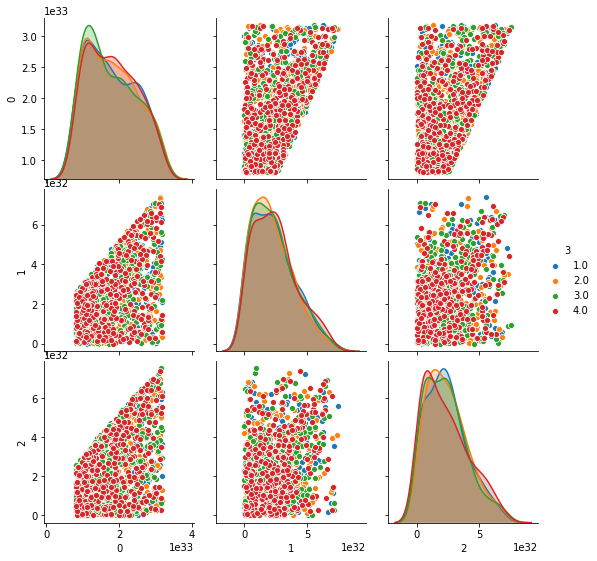

In [41]:
data = pd.concat([data, y_classes], axis = 1, sort = False)
data = pd.DataFrame(np.asarray(data))
figure = sns.pairplot(data, hue = 3)
figure.savefig('squared_pair_plot.png')

In [0]:
def majority_element(num_list):
    idx, ctr = 0, 1
        
    for i in range(1, len(num_list)):
        if num_list[idx] == num_list[i]:
            ctr += 1
        else:
            ctr -= 1
            if ctr == 0:
                idx = i
                ctr = 1
        
    return num_list[idx]

def make_prediction(pred):
    predicted = []
    for i in range(len(pred[0])):
        lst2 = [item[i] for item in pred]
        predicted.append(majority_element(lst2))
    return predicted

from random import randint
def get_estimators_predictions(x, y, classifier, test, y_test, num_of_f, original_N_F=27):
    best_estimators = None
    predictions = []
    accuracies = []
    max_acc = 0
    best_X_test = None
    features = x.columns.values
    for i in range(len(test)):
        f = []
        myset = set()
        for j in range(original_N_F-num_of_f+1):
            f_num = randint(0,len(features)-num_of_f)
            while myset.issuperset([f_num]):
                f_num = f_num + 1
                if f_num > original_N_F-num_of_f+1:
                    f_num = 0
            myset.add(f_num)
            f.append(features[f_num])
        x_copy = deepcopy(x)
        test_copy = deepcopy(test)
        for fi in f:
            x_copy = x_copy.drop(fi, axis=1)
            test_copy = test_copy.drop(fi, axis=1)
        clf = classifier
        clf = clf.fit(x_copy, y.values.ravel())
        clf_predictions = clf.predict(test_copy)
        predictions.append(clf_predictions)
        acc_score = accuracy_score(clf_predictions, y_test)
        accuracies.append(acc_score)
        if acc_score > max_acc:
            max_acc = acc_score
            best_X_test = x_copy
            best_estimator = clf
    return predictions, accuracies, best_estimator, best_X_test

In [53]:
data.head()

,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,288194,5,5,13
1,637056,336804,31085,4
2,5,735945,558829,4
3,585688,744463,582301,10
4,3731527,338946,242861,11


In [0]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(data, y_classes)
for train_index, test_index in sss.split(data, y_classes):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y_classes.iloc[train_index], y_classes.iloc[test_index]

In [41]:
data = pd.DataFrame(np.asarray(data)) # rearranging columns order
for i in range(0, 100):
    data = data.drop(i, axis=1)
data.head()

,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295
0,1.754553e+15,6.748282e+14,1.754553e+15,4.561839e+15,2.595493e+14,1.754553e+15,4.561839e+15,1.186078e+16,2.595493e+14,1.754553e+15,4.561839e+15,1.186078e+16,3.083803e+16,4.503031e+09,1.170788e+10,4.503031e+09,1.170788e+10,4.503031e+09,1.170788e+10,3.044049e+10,7.914528e+10,1.170788e+10,3.044049e+10,7.914528e+10,2.057777e+11,1.170788e+10,3.044049e+10,7.914528e+10,2.057777e+11,4.503031e+09,1.170788e+10,3.044049e+10,7.914528e+10,5.350221e+11,1.391057e+12,7.812500e+04,7.812500e+04,7.812500e+04,2.031250e+05,5.281250e+05,...,3.957264e+11,2.675110e+12,6.955287e+12,1.808375e+13,3.906250e+05,1.015625e+06,3.906250e+05,1.015625e+06,2.640625e+06,1.015625e+06,2.640625e+06,6.865625e+06,3.906250e+05,2.640625e+06,6.865625e+06,1.785062e+07,3.906250e+05,2.640625e+06,6.865625e+06,1.785062e+07,4.641162e+07,1.015625e+06,2.640625e+06,6.865625e+06,1.785062e+07,1.206702e+08,3.906250e+05,1.015625e+06,2.640625e+06,1.785062e+07,4.641162e+07,1.206702e+08,3.137426e+08,1.015625e+06,2.640625e+06,6.865625e+06,1.785062e+07,1.206702e+08,3.137426e+08,815730721.0
1,2.480887e+29,1.779391e+32,2.289710e+28,2.946386e+24,1.276251e+35,2.113266e+27,2.719339e+23,3.499229e+19,1.177903e+34,1.950419e+26,2.509787e+22,3.229580e+18,4.155805e+14,8.582517e+37,1.104393e+34,7.921151e+36,1.019289e+33,7.310750e+35,9.407432e+31,1.210543e+28,1.557720e+24,8.682498e+30,1.117259e+27,1.437682e+23,1.850001e+19,8.013428e+29,1.031163e+26,1.326895e+22,1.707441e+18,5.747551e+32,7.395916e+28,9.517022e+24,1.224645e+21,2.027816e+13,2.609381e+09,4.916326e+38,4.537476e+37,4.187819e+36,5.388862e+32,6.934357e+28,...,3.806809e+25,6.303464e+17,8.111262e+13,1.043753e+10,1.655838e+44,1.966530e+39,1.410474e+42,1.814990e+38,2.335519e+34,1.675128e+37,2.155545e+33,2.773743e+29,1.201469e+40,1.989439e+32,2.559999e+28,3.294192e+24,1.108884e+39,1.836134e+31,2.362726e+27,3.040343e+23,3.912296e+19,1.316949e+34,1.694642e+30,2.180656e+26,2.806055e+22,4.646377e+14,9.445682e+36,1.215465e+33,1.564053e+29,2.589821e+21,3.332567e+17,4.288329e+13,5.518197e+09,1.121802e+32,1.443528e+28,1.857524e+24,2.390251e+20,3.957872e+12,5.092966e+08,65536.0
2,1.594396e+20,1.691409e+25,1.210681e+20,8.665841e+14,1.794325e+30,9.193126e+19,6.580279e+14,4.710048e+09,1.362494e+30,6.980665e+19,4.996638e+14,3.576506e+09,2.560000e+04,6.032200e+35,4.317743e+30,4.580462e+35,3.278615e+30,3.478107e+35,2.489568e+30,1.781989e+25,1.275516e+20,1.890417e+30,1.353127e+25,9.685446e+19,6.932673e+14,1.435460e+30,1.027477e+25,7.354501e+19,5.264223e+14,1.522803e+35,1.089995e+30,7.801996e+24,5.584532e+19,2.861204e+09,2.048000e+04,1.169277e+41,8.878735e+40,6.741937e+40,4.825760e+35,3.454194e+30,...,3.120798e+25,1.598924e+15,1.144482e+10,8.192000e+04,8.605238e+46,4.677109e+41,4.961695e+46,3.551494e+41,2.542097e+36,2.696775e+41,1.930304e+36,1.381678e+31,2.860864e+46,1.465748e+36,1.049157e+31,7.509679e+25,2.172355e+46,1.112994e+36,7.966617e+30,5.702365e+25,4.081653e+20,1.180716e+41,8.451357e+35,6.049333e+30,4.330007e+25,2.218455e+15,1.252558e+46,8.965592e+40,6.417413e+35,3.287927e+25,2.353440e+20,1.684551e+15,1.205772e+10,6.807890e+40,4.872968e+35,3.487985e+30,2.496639e+25,1.279139e+15,9.155854e+09,65536.0
3,1.415344e+31,6.446351e+35,1.107048e+31,1.901161e+26,2.936067e+40,8.659062e+30,1.487042e+26,2.553735e+21,2.296521e+40,6.772909e+30,1.163129e+26,1.997470e+21,3.430304e+16,7.798830e+40,1.339312e+36,6.100057e+40,1.047578e+36,4.771317e+40,8.193902e+35,1.407159e+31,2.416549e+26,6.409072e+35,1.100646e+31,1.890167e+26,3.246030e+21,5.013022e+35,8.608987e+30,1.478443e+26,2.538967e+21,2.283240e+40,3.921065e+35,6.733742e+30,1.156402e+26,3.410467e+16,5.856880e+11,1.267365e+41,9.913026e+40,7.753730e+40,1.331567e+36,2.286734e+31,...,6.733742e+31,1.985918e

In [17]:
pred, acc, best_est, best_X_test = get_estimators_predictions(X_train, y_train,
                                        #RandomForestClassifier(n_estimators=100, max_depth=3, max_samples = 0.3), 
                                        KNeighborsClassifier(10),  
                                        X_test, y_test, 3, 4)
predicted = make_prediction(pred)
best_X_test.columns.values

array([0, 1, 4, 5, 6, 7, 8])

In [18]:
np.max(acc)

0.30324909747292417

In [19]:
# Majority accuracy score
accuracy_score(predicted, y_test)

0.2563176895306859

In [150]:
clf = KNeighborsClassifier(3).fit(X_train, y_train.values.ravel())
predicted = clf.predict(X_test)
accuracy_score(y_test, predicted)

0.2743682310469314

In [0]:
def estimate_on_portions(x, y, classifier, n, x_test, y_test):
  best_est = None
  estimators = []
  acc = []
  max_acc = 0
  pred = []
  interval = int(len(x)/n)
  lim1 = 0
  lim2 = interval
  for i in range(n):
    portion_x = x[lim1:lim2]
    portion_y = y[lim1:lim2]
    clf = classifier.fit(portion_x, portion_y.values.ravel())
    predicted = clf.predict(x_test)
    pred.append(predicted)
    current_acc = accuracy_score(y_test, predicted)
    if current_acc > max_acc:
      max_acc = current_acc
      best_est = clf  
    acc.append(current_acc)
    estimators.append(clf)
    lim1 = lim1 + interval
    lim2 = lim2 + interval
  return max_acc, acc, best_est, estimators, pred


In [39]:
max_acc, acc, best_est, estimators, pred = estimate_on_portions(X_train, y_train, 
                                                                KNeighborsClassifier(10), 20,
                                                                X_test, y_test)
predicted = make_prediction(pred)
accuracy_score(predicted, y_test)

0.2490974729241877

In [40]:
max_acc 

0.2924187725631769